<a href="https://colab.research.google.com/github/FarshadAmiri/Image_processing/blob/main/Photo_filters.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import cv2
from scipy.interpolate import UnivariateSpline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

In [2]:
!wget -O landscape.jpg https://github.com/FarshadAmiri/Image_processing/raw/main/Create%20Photo%20Filters%20with%20OpenCV/landscape.jpg

--2021-03-27 06:50:49--  https://github.com/FarshadAmiri/Image_processing/raw/main/Create%20Photo%20Filters%20with%20OpenCV/landscape.jpg
Resolving github.com (github.com)... 192.30.255.113
Connecting to github.com (github.com)|192.30.255.113|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/FarshadAmiri/Image_processing/main/Create%20Photo%20Filters%20with%20OpenCV/landscape.jpg [following]
--2021-03-27 06:50:49--  https://raw.githubusercontent.com/FarshadAmiri/Image_processing/main/Create%20Photo%20Filters%20with%20OpenCV/landscape.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 363080 (355K) [image/jpeg]
Saving to: ‘landscape.jpg’

landscape.jpg       100%[===================>] 354.57K  --

In [3]:
path = '/content/landscape.jpg'

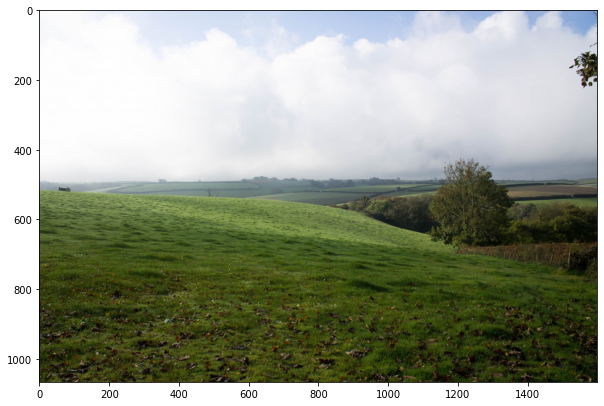

In [8]:
image = mpimg.imread(path)
plt.figure(figsize=(10,8))
plt.imshow(image)

In [44]:
r,g,b = cv2.split(image)

In [16]:
def mapping_function(x,y):
  spl = UnivariateSpline(x,y)
  return spl

In [45]:
x = [0,30,60,120,150,180,210,240,255]
y = [0,35,70,135,170,205,240,255,255]
spl = UnivariateSpline(x,y)

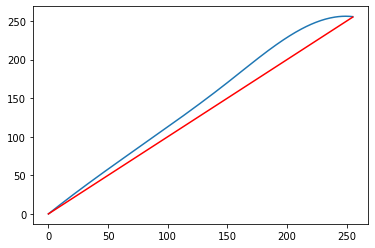

In [15]:
plt.figure(figsize=(6,4))
plt.plot(spl(range(256)))
plt.plot(np.arange(0,256),'r-')

In [146]:
def increase(color_channel):
  x = [0,30,60,120,150,180,210,240,255]
  y = [0,35,70,135,170,205,240,255,255]
  spl = UnivariateSpline(x,y)
  color_spl = spl(color_channel)
  color_spl = np.where(color_spl>255,255,color_spl)
  color_spl = color_spl.astype(np.uint8)
  return color_spl

def decrease(color_channel):
  x = [0,30,60,120,150,180,210,240,255]
  y = [0,25,50,105,130,155,180,200,215]
  spl = UnivariateSpline(x,y)
  color_spl = spl(color_channel)
  color_spl = color_spl.astype(np.uint8)
  return color_spl

def custom(color_channel):
  x = [0,30,60,120,150,180,210,240,255]
  y = [0,50,90,150,170,190,210,220,235]
  spl = UnivariateSpline(x,y)
  color_spl = spl(color_channel)
  color_spl = color_spl.astype(np.uint8)
  return color_spl

In [147]:
def apply_cool(img):
  r,g,b = cv2.split(img)
  cool_img = cv2.merge((decrease(r),g,increase(b)))
  return cool_img

def apply_warm(img):
  r,g,b = cv2.split(img)
  warm_img = cv2.merge((increase(r),g,decrease(b)))
  return warm_img

def apply_custom(img):
  r,g,b = cv2.split(img)
  custom_img = cv2.merge((custom(r),g,b))
  return custom_img

In [143]:
import ipywidgets as widgets
from ipywidgets import interact, fixed

def choice(x,img):
  if x == 'No Filter':
    return plt.imshow(img)
  if x == 'Cool':
    return plt.imshow(apply_cool(img))
  if x == 'Warm':
    return plt.imshow(apply_warm(img))
  if x == 'Custom':
    return plt.imshow(apply_custom(img))
  
interact(choice, x = widgets.Dropdown(options=['No Filter', 'Cool', 'Warm', 'Custom'], description = 'Filter'), img = fixed(image))

interactive(children=(Dropdown(description='Filter', options=('No Filter', 'Cool', 'Warm', 'Custom'), value='N…

<function __main__.choice>